Original image shape: (1200, 1920, 3)


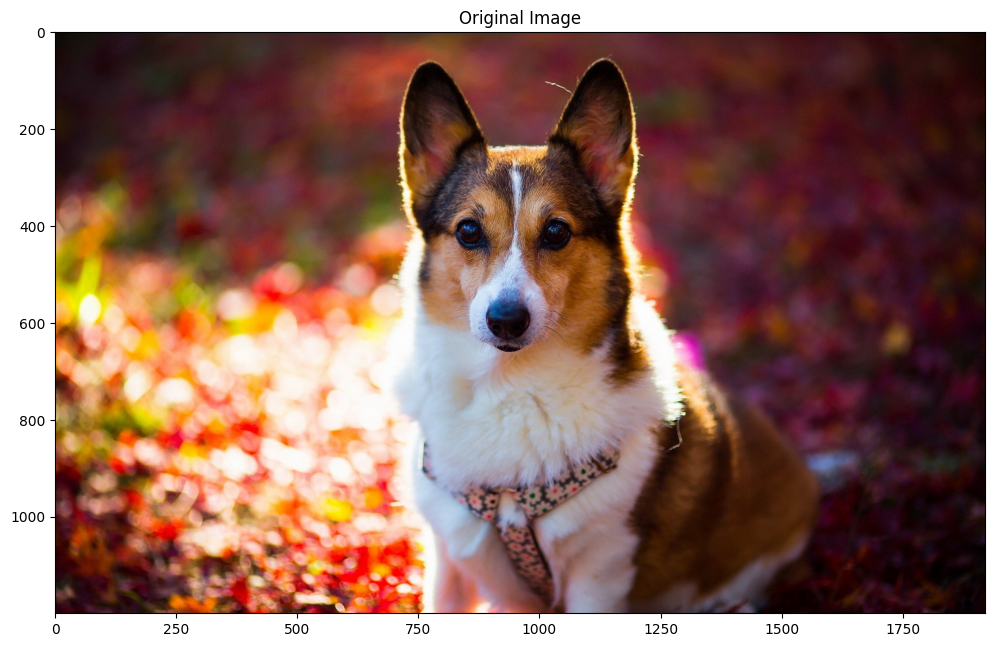

Grayscale image shape: (1200, 1920)
Max value in the normalized grayscale image: 1.0


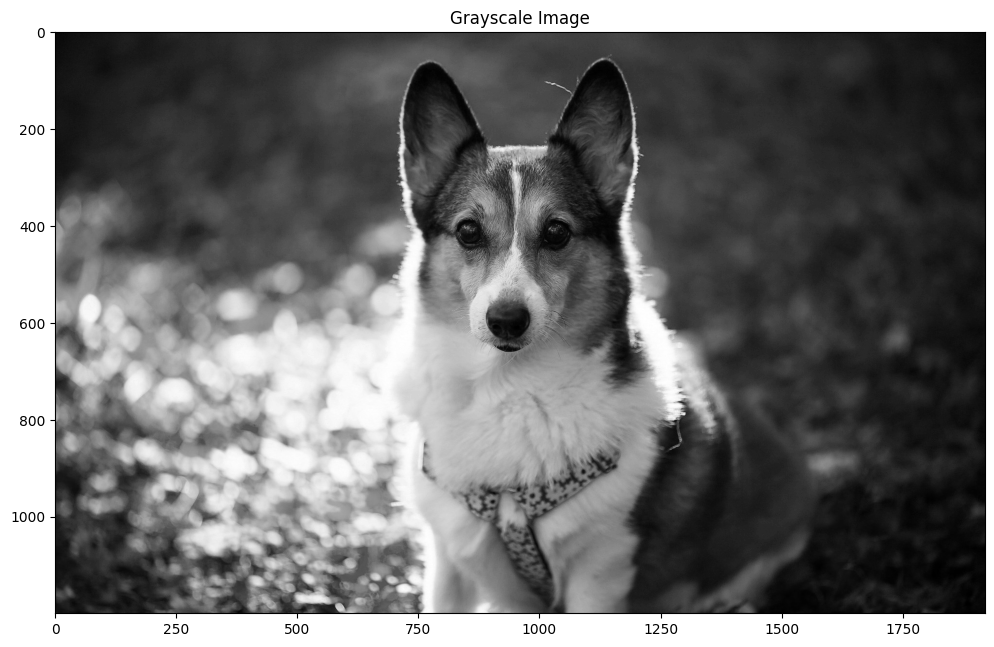

Top 5 Eigenvalues: [49.56184623+0.j  9.67437991+0.j  3.80507255+0.j  3.45683206+0.j
  2.15929571+0.j]
Eigenvectors shape: (1920, 1920)
Number of components explaining 95% variance: 17


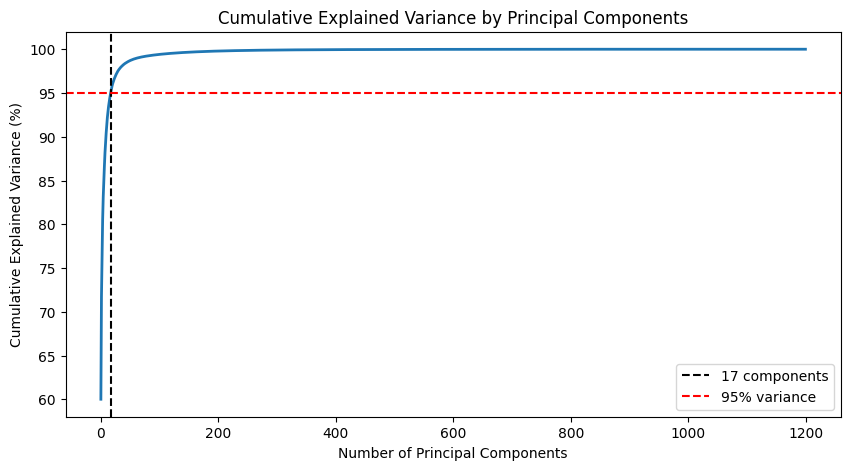

Reconstruction Error: 0.1070
Compression Ratio: 0.0089


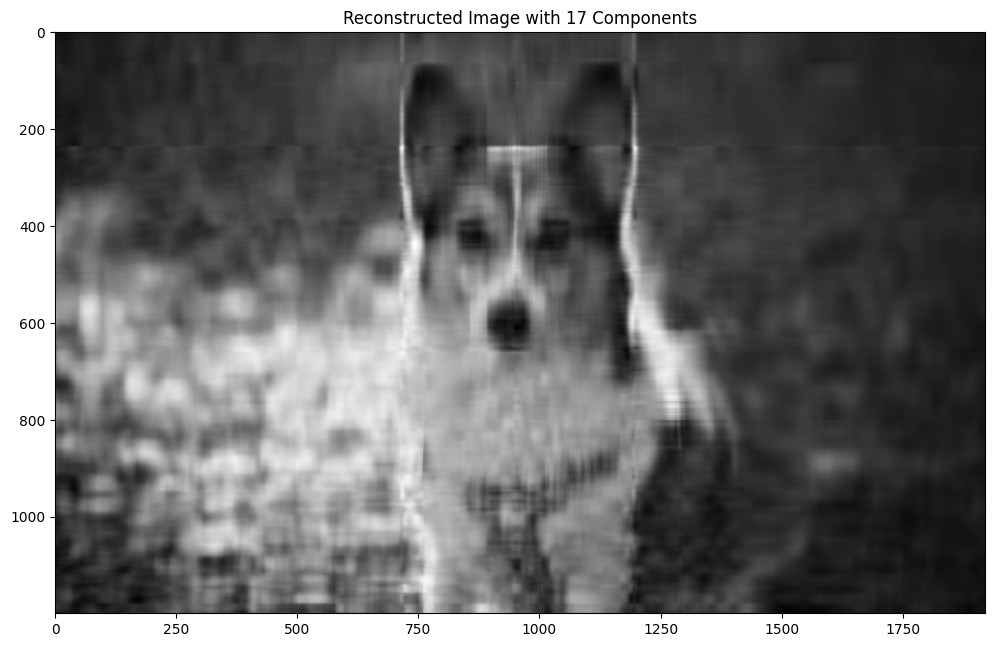

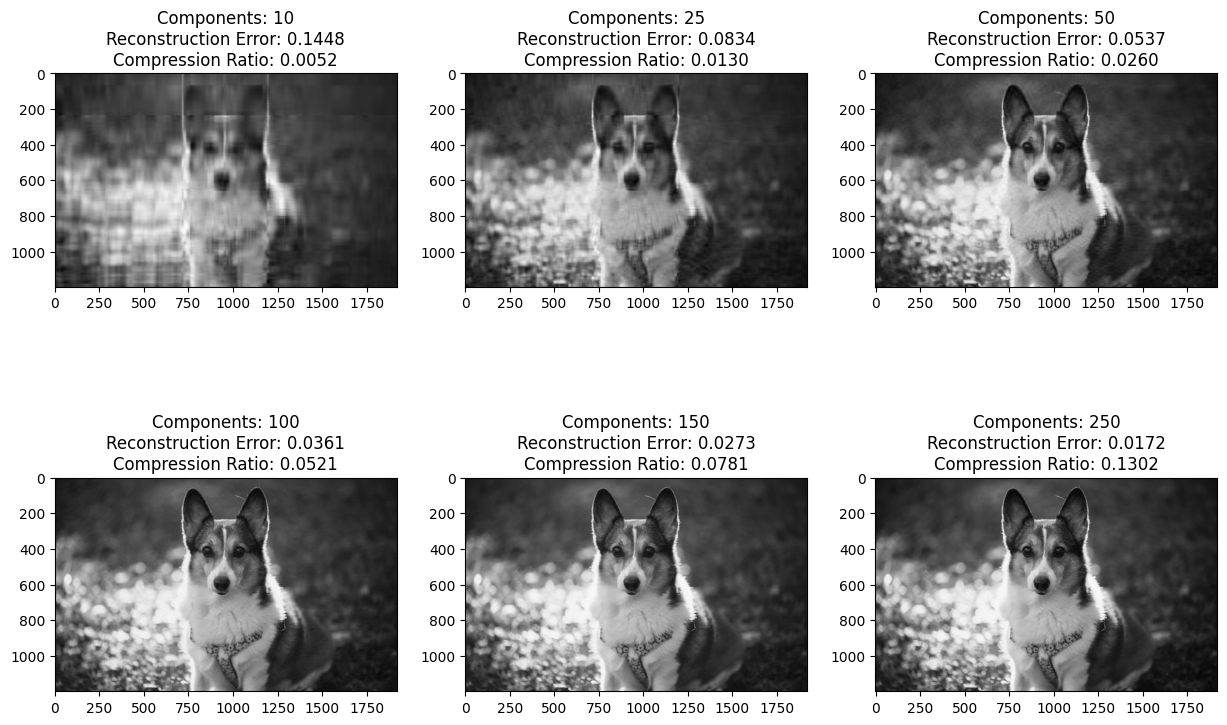

In [32]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA

# Load and display the original image
image_raw = imread("dog.jpg")
print(f"Original image shape: {image_raw.shape}")

plt.figure(figsize=[12,8])
plt.imshow(image_raw)
plt.title("Original Image")
plt.show()

# Convert the image to grayscale by summing across the RGB channels
image_sum = image_raw.sum(axis=2)
print(f"Grayscale image shape: {image_sum.shape}")

# Normalize the grayscale image
#Using Min-Max normalisation
image_bw = image_sum / image_sum.max()
print(f"Max value in the normalized grayscale image: {image_bw.max()}")

plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap=plt.cm.gray)
plt.title("Grayscale Image")
plt.show()

# Function to perform mean centering, calculate covariance, eigenvalues, and eigenvectors
def perform_pca(image_bw):
    # Mean centering
    mean_centered = image_bw - np.mean(image_bw, axis=0)
    # Calculate the covariance matrix
    covariance_matrix = np.cov(mean_centered, rowvar=False)
    
    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Sort eigenvectors by eigenvalues in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, idx]
    eigenvalues = eigenvalues[idx]
    
    return mean_centered, covariance_matrix, eigenvalues, eigenvectors

# Perform PCA on the grayscale image
mean_centered, covariance_matrix, eigenvalues, eigenvectors = perform_pca(image_bw)

print("Top 5 Eigenvalues:", eigenvalues[:5])
print(f"Eigenvectors shape: {eigenvectors.shape}")

# PCA using scikit-learn
pca = PCA()
pca.fit(image_bw)

# Cumulative variance explained by principal components
var_cumu = np.cumsum(pca.explained_variance_ratio_) * 100

# Find the number of components that explain 95% of the variance
k = np.argmax(var_cumu > 95)
print(f"Number of components explaining 95% variance: {k}")

plt.figure(figsize=[10,5])
plt.plot(var_cumu, linewidth=2)
plt.axvline(x=k, color="k", linestyle="--", label=f"{k} components")
plt.axhline(y=95, color="r", linestyle="--", label="95% variance")
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.legend()
plt.show()

# Reconstruct the image using Incremental PCA
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

# Calculate reconstruction error
reconstruction_error = np.linalg.norm(image_bw - image_recon, 'fro') / np.linalg.norm(image_bw, 'fro')
print(f"Reconstruction Error: {reconstruction_error:.4f}")

# Calculate the compression ratio
original_size = image_bw.size
compressed_size = k * image_bw.shape[0]
compression_ratio = compressed_size / original_size
print(f"Compression Ratio: {compression_ratio:.4f}")

# Display the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon, cmap=plt.cm.gray)
plt.title(f"Reconstructed Image with {k} Components")
plt.show()

# Function to reconstruct and plot the image for a given number of components
def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    
    # Calculate reconstruction error
    recon_error = np.linalg.norm(image_bw - image_recon, 'fro') / np.linalg.norm(image_bw, 'fro')
    
    
    # Calculate compression ratio
    comp_ratio = k * image_bw.shape[0] / image_bw.size
    
    plt.imshow(image_recon, cmap=plt.cm.gray)
    plt.title(f"Components: {k}\nReconstruction Error: {recon_error:.4f}\nCompression Ratio: {comp_ratio:.4f}")

# Plotting reconstructed images with various numbers of components
ks = [10, 25, 50, 100, 150, 250]

plt.figure(figsize=[15,9])
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plot_at_k(ks[i])

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()


In [ ]:
# Print the mean-centered grayscale image
print("Mean-centered grayscale image:")
print(mean_centered)
